In [2]:
from pandas_datareader import data as pdr
from datetime import datetime as dtt

import pandas as pd
import plotly.offline as py_offline
import plotly.graph_objs as go
import fix_yahoo_finance as yf


TnS_dataframe = pd.read_csv("data/TnS.csv")
TnS_dataframe['EventTime'] = TnS_dataframe['EventTime'].map(lambda x: datetime.strptime(str(x[:19]), "%Y%m%d-%H%M%S.%f"))

df = TnS_dataframe.loc[:, ["EventTime", "Price"]]
df = df.set_index('EventTime')
test = df.resample('1min').ohlc().bfill()['Price']

yf.pdr_override()
symbol_candle = go.Candlestick(x=test.index,
                            open=test.open,
                            high=test.high,
                            low=test.low,
                            close=test.close,
                            increasing=dict(line=dict(color= '#00FF00')),
                            decreasing=dict(line=dict(color= '#FF0000'))
                           )
data = [symbol_candle]

layout = go.Layout(
    plot_bgcolor='rgb(59,68,75)'
)

fig = go.Figure(data=data, layout=layout)
py_offline.iplot(fig, filename='Candle Stick')

/Users/tongcc/miniconda3/envs/tradingview/lib/python3.13/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning:



*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance




FileNotFoundError: [Errno 2] No such file or directory: 'data/TnS.csv'

### using yfinance

In [ ]:
import yfinance as yf
import pandas as pd
 
symbols = ['^GSPC','^VIX', '^FTSE', '^N225', '^HSI']
data = yf.download(symbols, start='2022-12-01', end  ='2022-12-06')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_1433/1052189102.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-06-07', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             TSM         TSM         TSM         TSM       TSM
Date                                                                
2024-06-10  165.839874  167.496688  160.179065  161.737267  12438400
2024-06-11  163.423691  166.086436  161.530168  165.859598  11508600
2024-06-12  170.593399  173.630906  169.173264  170.968161  20309500
2024-06-13  171.062332  172.209940  168.687969  171.101898  15591800
2024-06-14  170.666595  171.784525  168.539576  170.162051   9192500
...                ...         ...         ...         ...       ...
2025-06-02  194.839996  195.160004  192.199997  193.039993   7447400
2025-06-03  197.610001  198.169998  193.639999  194.350006   9548300
2025-06-04  202.399994  204.029999  200.380005  201.380005  13531100
2025-06-05  203.339996  205.759995  202.279999  204.880005  12214300
2025-06-06  205.179993  206.289993  203.229996  203.580002   8526500

[249 rows x 5 columns]


In [7]:
# Splitting the downloaded data into separate DataFrames
adj_close_df = None
if 'Adj Close' in data.columns:
    adj_close_df = data['Adj Close']
    print("Adj Close:"); print(adj_close_df.round(2))
close_df     = data['Close']
high_df      = data['High']
low_df       = data['Low']
open_df      = data['Open']
volume_df    = data['Volume']
 
# Printing the separate DataFrames
print("\nClose:");   print(close_df.round(2))
print("\nHigh:");    print(high_df.round(2))
print("\nLow:");     print(low_df.round(2))
print("\nOpen:");    print(open_df.round(2))
print("\nVolume:");  print(volume_df)


Close:
Ticker         TSM
Date              
2024-06-10  165.84
2024-06-11  163.42
2024-06-12  170.59
2024-06-13  171.06
2024-06-14  170.67
...            ...
2025-06-02  194.84
2025-06-03  197.61
2025-06-04  202.40
2025-06-05  203.34
2025-06-06  205.18

[249 rows x 1 columns]

High:
Ticker         TSM
Date              
2024-06-10  167.50
2024-06-11  166.09
2024-06-12  173.63
2024-06-13  172.21
2024-06-14  171.78
...            ...
2025-06-02  195.16
2025-06-03  198.17
2025-06-04  204.03
2025-06-05  205.76
2025-06-06  206.29

[249 rows x 1 columns]

Low:
Ticker         TSM
Date              
2024-06-10  160.18
2024-06-11  161.53
2024-06-12  169.17
2024-06-13  168.69
2024-06-14  168.54
...            ...
2025-06-02  192.20
2025-06-03  193.64
2025-06-04  200.38
2025-06-05  202.28
2025-06-06  203.23

[249 rows x 1 columns]

Open:
Ticker         TSM
Date              
2024-06-10  161.74
2024-06-11  165.86
2024-06-12  170.97
2024-06-13  171.10
2024-06-14  170.16
...            ...
2025-06

In [8]:
# Create a MultiIndex from the columns
data.columns = data.columns.swaplevel(0, 1)
data.sort_index(axis=1, level=0, inplace=True)
 
# Split the data based on symbols
symbol_dfs = {}
for symbol in symbols:
    # Create a copy of the DataFrame
    symbol_dfs[symbol] = data[symbol].copy()  
    # Divide 'Volume' column by 1000
    symbol_dfs[symbol]['Volume'] /= 1000000
    symbol_dfs[symbol] = symbol_dfs[symbol].round(0)
 
# Print the separate DataFrames
for symbol, df in symbol_dfs.items():
    print(f"Data for symbol: {symbol}")
    print(df)

Data for symbol: TSM
Price       Close   High    Low   Open  Volume
Date                                          
2024-06-10  166.0  167.0  160.0  162.0    12.0
2024-06-11  163.0  166.0  162.0  166.0    12.0
2024-06-12  171.0  174.0  169.0  171.0    20.0
2024-06-13  171.0  172.0  169.0  171.0    16.0
2024-06-14  171.0  172.0  169.0  170.0     9.0
...           ...    ...    ...    ...     ...
2025-06-02  195.0  195.0  192.0  193.0     7.0
2025-06-03  198.0  198.0  194.0  194.0    10.0
2025-06-04  202.0  204.0  200.0  201.0    14.0
2025-06-05  203.0  206.0  202.0  205.0    12.0
2025-06-06  205.0  206.0  203.0  204.0     9.0

[249 rows x 5 columns]


### play with yfinance python package

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
symbols = ['TSM']
data = yf.download(symbols, start='2024-06-09', end  ='2025-06-07', interval='1d')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_2105/2257794850.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-06-07', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             TSM         TSM         TSM         TSM       TSM
Date                                                                
2024-06-10  165.839890  167.496703  160.179079  161.737282  12438400
2024-06-11  163.423706  166.086451  161.530183  165.859614  11508600
2024-06-12  170.593384  173.630891  169.173249  170.968146  20309500
2024-06-13  171.062317  172.209925  168.687954  171.101883  15591800
2024-06-14  170.666595  171.784525  168.539576  170.162051   9192500
...                ...         ...         ...         ...       ...
2025-06-02  194.839996  195.160004  192.199997  193.039993   7447400
2025-06-03  197.610001  198.169998  193.639999  194.350006   9548300
2025-06-04  202.399994  204.029999  200.380005  201.380005  13531100
2025-06-05  203.339996  205.759995  202.279999  204.880005  12214300
2025-06-06  205.179993  206.289993  203.229996  203.580002   8526500

[249 rows x 5 columns]


In [3]:
# formulas
def calculate_ema(data, period):
    return data['Close'].ewm(span=period, adjust=False).mean()

def calulate_sma(data, period):
    return data['Close'].rolling(window=period).mean()

# formula calculating bollinger bands
def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    sma = calulate_sma(data, period)
    rolling_std = data['Close'].rolling(window=period).std()
    upper_band = sma + (rolling_std * num_std_dev)
    lower_band = sma - (rolling_std * num_std_dev)
    return upper_band.fillna(0), lower_band.fillna(0)

In [4]:
upper_band, lower_band = calculate_bollinger_bands(data)

In [5]:
upper_band

Ticker,TSM
Date,
2024-06-10,0.000000
2024-06-11,0.000000
2024-06-12,0.000000
2024-06-13,0.000000
2024-06-14,0.000000
...,...
2025-06-02,206.801779
2025-06-03,207.139281
2025-06-04,207.174777


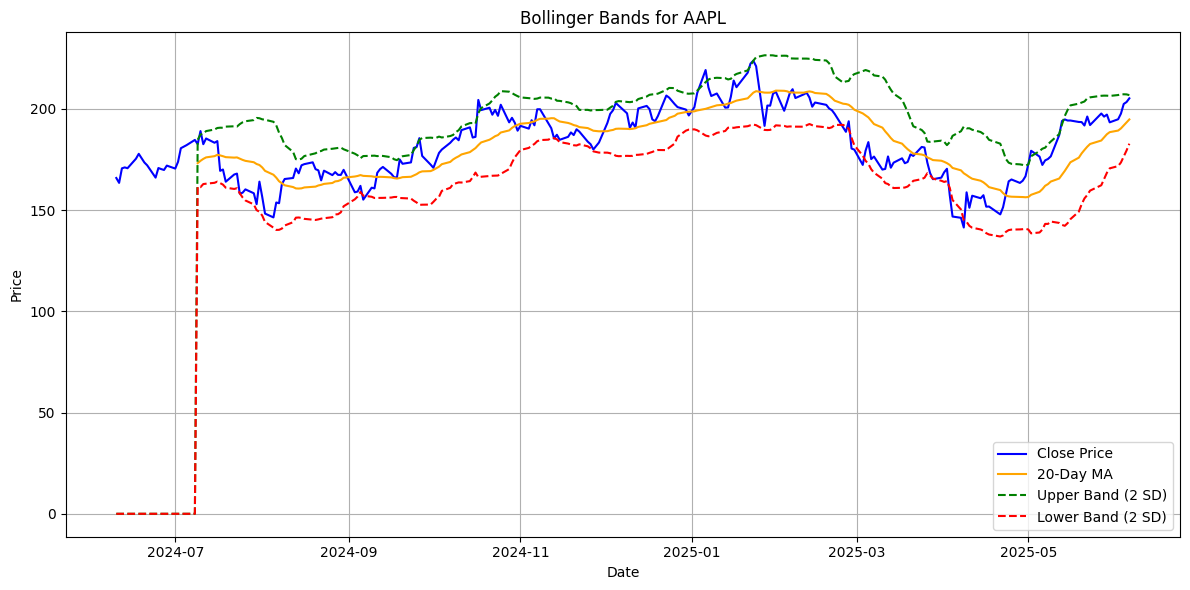

In [7]:
# plot a graph based on the function calculate_bollinger_bands
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

def plot_bollinger_bands(data, stock_symbol, period=20, num_std_dev=2, window=20, num_std=2):
    upper_band, lower_band = calculate_bollinger_bands(data, period, num_std_dev)
    sma = calulate_sma(data, period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(sma, label=f'{window}-Day MA', color='orange')
    plt.plot(upper_band, label=f'Upper Band ({num_std} SD)', color='green', linestyle='--')
    plt.plot(lower_band, label=f'Lower Band ({num_std} SD)', color='red', linestyle='--')

    plt.title(f'Bollinger Bands for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot Bollinger Bands
plot_bollinger_bands(data, 'AAPL', period=20, num_std_dev=2)